## EDA, Preprocessing & Vectorization

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pickle

## Fake Reviews

In [3]:
fake_reviews = pd.read_csv('/content/drive/MyDrive/AuthentiFeel/processed_data/fake_reviews.csv')

### EDA

In [ ]:
fake_reviews.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
fake_reviews.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
fake_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


<Axes: xlabel='rating', ylabel='count'>

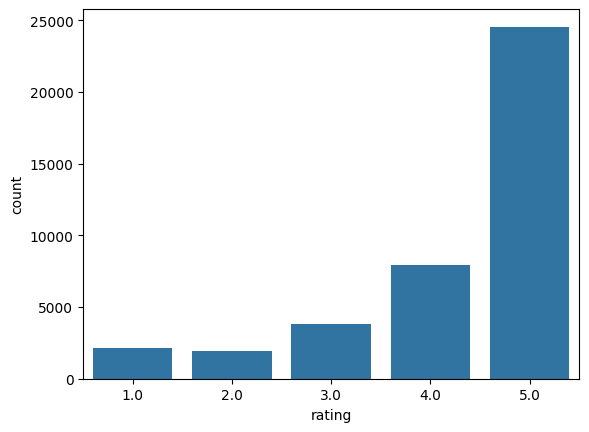

In [ ]:
sns.countplot(x='rating',data=fake_reviews)

<Axes: xlabel='label', ylabel='count'>

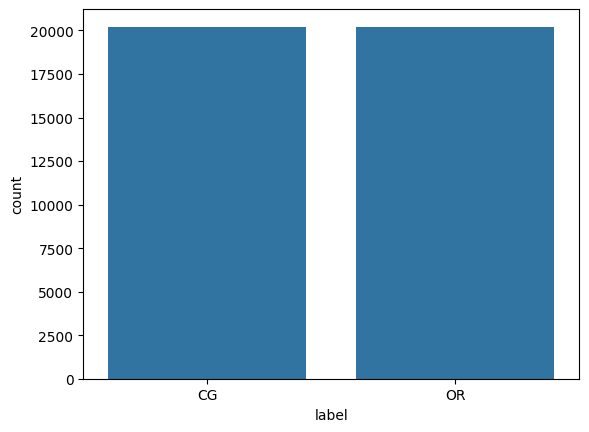

In [ ]:
sns.countplot(x='label',data=fake_reviews)

<Axes: xlabel='category', ylabel='count'>

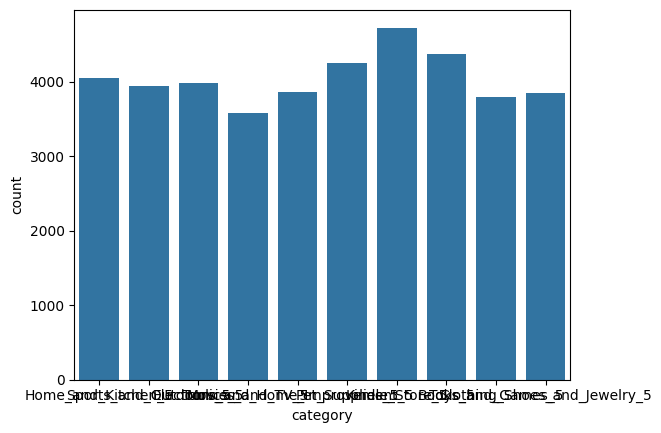

In [ ]:
sns.countplot(x='category',data=fake_reviews)

In [ ]:
fake_reviews['review_length'] = fake_reviews['text_'].apply(len)

<Axes: xlabel='review_length', ylabel='Count'>

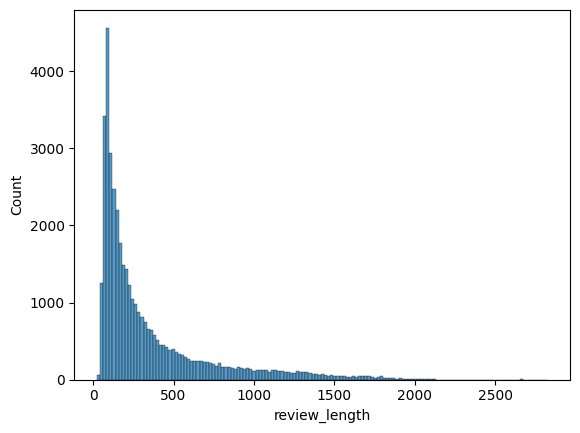

In [ ]:
sns.histplot(fake_reviews['review_length'])

In [ ]:
all_words = ' '.join(fake_reviews['text_']).split(' ')
most_common_words = Counter(all_words).most_common(20)
most_common_words

[('the', 125375),
 ('a', 94870),
 ('I', 91688),
 ('and', 86025),
 ('to', 67735),
 ('is', 63943),
 ('', 62066),
 ('it', 45646),
 ('of', 45107),
 ('for', 37686),
 ('this', 36631),
 ('in', 28095),
 ('The', 27962),
 ('was', 25895),
 ('that', 25464),
 ('with', 22811),
 ('have', 22712),
 ('my', 20354),
 ('very', 19073),
 ('are', 18901)]

# Model Selection & Training

### Preprocessing

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    #tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [6]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = fake_reviews['text_'].to_list()
target = fake_reviews['label'].to_list()
#preprocessed_data = [preprocess_text(doc) for doc in data]

### Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)
#tfidf_vectorizer = TfidfVectorizer(max_features=20000)
tfidf_data = tfidf_vectorizer.fit_transform(preprocessed_data)
tfidf_data = normalize(tfidf_data, norm='l2', axis=1)

In [ ]:
processed_df = pd.DataFrame(tfidf_data.toarray(),columns = tfidf_vectorizer.get_feature_names_out())

In [ ]:
processed_df['label'] = target

### Linear SVC

In [7]:
%%capture
!pip install catboost
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, classification_report, confusion_matrix

In [13]:
seed = 42
X_train, X_test, Y_train, Y_test=train_test_split(tfidf_data,target,random_state=seed)

NameError: name 'tfidf_data' is not defined

In [14]:
svc_clf=LinearSVC(C=100, max_iter=100)
#svc_clf.fit(X_train, Y_train)

In [ ]:
y_train_pred=svc_clf.predict(X_train)
y_test_pred=svc_clf.predict(X_test)
svc_clf.score(X_test, Y_test)

0.9517214087851207

Text(0, 0.5, 'True Class')

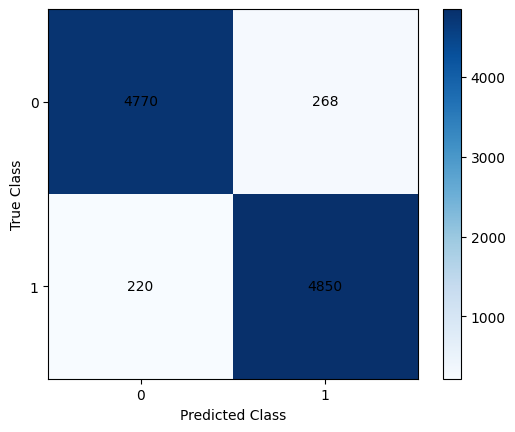

In [ ]:
cm=confusion_matrix(Y_test, y_test_pred)
n=len(cm)
plt.imshow(cm,cmap='Blues',extent=[-0.5,n-0.5,-0.5,n-0.5])
for i in range(n):
  for j in range(n):
    plt.text(i,j,cm[n-j-1,i],ha='center',va='center')
plt.colorbar()
plt.xticks(range(n))
plt.yticks(range(n),range(n-1,-1,-1))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [ ]:
precision_score(Y_test, y_test_pred, pos_label='CG')

0.9559118236472945

In [ ]:
report=classification_report(Y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

          CG       0.96      0.95      0.95      5038
          OR       0.95      0.96      0.95      5070

    accuracy                           0.95     10108
   macro avg       0.95      0.95      0.95     10108
weighted avg       0.95      0.95      0.95     10108



In [16]:
log_reg=LogisticRegression(solver='saga', max_iter=500, C=100)
svc_clf=LinearSVC(C=100, max_iter=100)
multi=MultinomialNB(alpha=0.01)
ensemble= VotingClassifier(estimators=[('svc',svc_clf),('log',log_reg),('nb', multi)])
#ensemble.fit(X_train, Y_train)
#ensemble.score(X_test, Y_test)

In [ ]:
y_train_pred=ensemble.predict(X_train)
y_test_pred=ensemble.predict(X_test)
ensemble.score(X_test, Y_test)

0.9509299564701227

Text(0, 0.5, 'True Class')

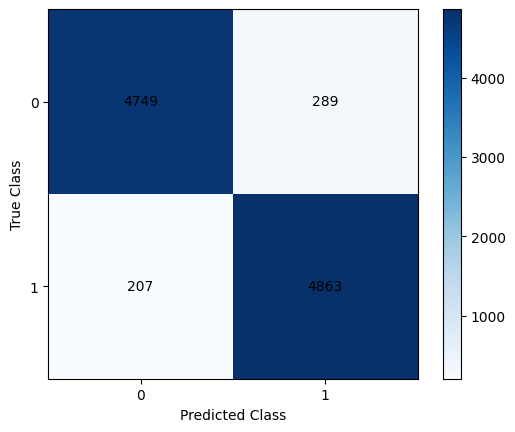

In [ ]:
cm=confusion_matrix(Y_test, y_test_pred)
n=len(cm)
plt.imshow(cm,cmap='Blues',extent=[-0.5,n-0.5,-0.5,n-0.5])
for i in range(n):
  for j in range(n):
    plt.text(i,j,cm[n-j-1,i],ha='center',va='center')
plt.colorbar()
plt.xticks(range(n))
plt.yticks(range(n),range(n-1,-1,-1))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [ ]:
precision_score(Y_test, y_test_pred, pos_label='CG')

0.9582324455205811

In [ ]:
report=classification_report(Y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

          CG       0.96      0.94      0.95      5038
          OR       0.94      0.96      0.95      5070

    accuracy                           0.95     10108
   macro avg       0.95      0.95      0.95     10108
weighted avg       0.95      0.95      0.95     10108



### Word cloud

In [ ]:
svc_clf=LinearSVC(C=100, max_iter=100)
svc_clf.fit(tfidf_data, target)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, max_iter=100)

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

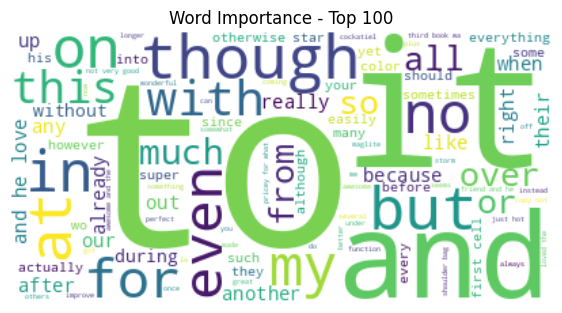

In [ ]:
top_coeff = np.argsort((svc_clf.coef_[0]))[::-1][:100]
word_freq = {feature_names[idx]:svc_clf.coef_[0][idx] for idx in top_coeff}

wordcloud_log_reg = WordCloud(background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud_log_reg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Importance - Top 100')
plt.show()

In [ ]:
log_reg.coef_[0]

array([-0.00166961, -0.34249882,  0.0333745 , ...,  0.58622892,
        0.58622892, -0.09253027])

# Inferencing

### Training

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

# Make sure you have the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

class TextPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        processed = []
        for doc in X:
            doc = doc.lower()
            tokens = nltk.word_tokenize(doc)
            # Uncomment the following line if you decide to include stopword and punctuation removal
            # tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
            tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
            processed.append(' '.join(tokens))
        return processed


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### LinearSVC model saving

In [17]:


# Initialize the pipeline with your custom preprocessor, a vectorizer, and a classifier
pipeline = Pipeline([
    ('text_preprocess', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)),
    ('classifier', svc_clf)
])

In [18]:
seed = 42
pipeline.fit(data, target)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('text_preprocess',
                 <__main__.TextPreprocessor object at 0x7816d8c078b0>),
                ('vectorizer',
                 TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 3),
                                 sublinear_tf=True)),
                ('classifier', LinearSVC(C=100, max_iter=100))])

In [ ]:
import pickle
with open('/content/drive/MyDrive/AuthentiFeel/models/ProductReviewsModel_LinearSVC.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
#dump(pipeline, '/content/drive/MyDrive/AuthentiFeel/models/ProductReviewsModel.joblib')

### Ensemble Saving

In [19]:


# Initialize the pipeline with your custom preprocessor, a vectorizer, and a classifier
pipeline = Pipeline([
    ('text_preprocess', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)),
    ('classifier', ensemble)
])

In [20]:
seed = 42
pipeline.fit(data, target)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('text_preprocess',
                 <__main__.TextPreprocessor object at 0x7816d8bc53f0>),
                ('vectorizer',
                 TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 3),
                                 sublinear_tf=True)),
                ('classifier',
                 VotingClassifier(estimators=[('svc',
                                               LinearSVC(C=100, max_iter=100)),
                                              ('log',
                                               LogisticRegression(C=100,
                                                                  max_iter=500,
                                                                  solver='saga')),
                                              ('nb',
                                               MultinomialNB(alpha=0.01))]))])

In [ ]:
import pickle
with open('/content/drive/MyDrive/AuthentiFeel/models/ProductReviewsModel_Ensemble.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
#dump(pipeline, '/content/drive/MyDrive/AuthentiFeel/models/ProductReviewsModel.joblib')

## Training one data point

In [21]:
with open('/content/drive/MyDrive/AuthentiFeel/models/FakeReviewsModel_LinearSVC.pkl', 'rb') as file:
    model1= pickle.load(file)

In [22]:
model1.predict(["Terrible Purchase. Do not Recommend!"])

array(['OR'], dtype='<U2')

In [23]:
with open('/content/drive/MyDrive/AuthentiFeel/models/FakeReviewsModel_Ensemble.pkl', 'rb') as file:
    model2= pickle.load(file)

In [24]:
model2.predict(["Terrible Purchase. Do not Recommend!"])

array(['OR'], dtype='<U2')